In [102]:
import pandas as pd
import numpy as np

In [103]:
from azureml import Workspace
ws = Workspace()
equities = ws.user_datasets['Equities_data.csv'].to_dataframe()

In [104]:
equities.head()

,Ticker,Date,Open,High,Low,Unnamed: 5,Shares Outstanding,Market Cap
0,000001_CH_Equity,2004-09-01,2.270,2.270,2.226,NaN,4899549,15605.4760
1,000001_CH_Equity,2004-09-02,2.229,2.248,2.206,NaN,7079891,15586.0178
2,000001_CH_Equity,2004-09-03,2.229,2.240,2.217,NaN,4324956,15527.6432
3,000001_CH_Equity,2004-09-06,2.223,2.223,2.201,NaN,3144284,15508.1850
4,000001_CH_Equity,2004-09-07,2.220,2.268,2.220,NaN,3828599,15780.5998


In [105]:
#US only
equities_US = equities[equities['Ticker'].str.contains("US_Equity")]

In [106]:
equities_US.head()

,Ticker,Date,Open,High,Low,Unnamed: 5,Shares Outstanding,Market Cap
1442200,AAL_US_Equity,2013-12-09,23.95,25.44,23.4501,NaN,43197268,6422.2974
1442201,AAL_US_Equity,2013-12-10,24.54,25.17,24.4100,NaN,18660625,6495.3967
1442202,AAL_US_Equity,2013-12-11,25.44,27.20,25.3700,NaN,38843371,6785.1833
1442203,AAL_US_Equity,2013-12-12,26.20,26.71,25.4500,NaN,19981824,6644.2061
1442204,AAL_US_Equity,2013-12-13,25.61,26.30,25.5201,NaN,12192421,6847.8399


In [107]:
#large Cap stocks
CAP = 50000
equities_US_largeCap = equities_US[equities_US['Market Cap']>CAP]

In [108]:
equities_US_largeCap.head() 

,Ticker,Date,Open,High,Low,Unnamed: 5,Shares Outstanding,Market Cap
1442680,AAPL_US_Equity,2005-11-03,8.6086,8.9029,8.5814,NaN,221095413,51324.8375
1442681,AAPL_US_Equity,2005-11-04,8.6214,8.7486,8.5171,NaN,219582363,50744.0608
1442685,AAPL_US_Equity,2005-11-10,8.6629,8.7429,8.4300,NaN,166991405,50768.9556
1442686,AAPL_US_Equity,2005-11-11,8.7914,8.8729,8.7629,NaN,106372469,51067.6942
1442687,AAPL_US_Equity,2005-11-14,8.7914,8.8543,8.7014,NaN,92488984,50993.0095


In [109]:
dates = equities_US_largeCap['Date'].unique()
print len(dates)

2517


In [110]:
equities_US_largeCap_clean = pd.pivot_table(equities_US_largeCap, values='Open', index=['Date'],\
                     columns=['Ticker'], aggfunc=np.mean)

In [111]:
#time series of stocks from 2004 to 2014
equities_US_largeCap_clean.head()

Ticker,AAPL_US_Equity,ABBV_US_Equity,ABT_US_Equity,ACN_US_Equity,AGN_US_Equity,AIG_US_Equity,AMGN_US_Equity,AMZN_US_Equity,ANTM_US_Equity,APA_US_Equity,...,USB_US_Equity,UTX_US_Equity,VWO_US_Equity,VZ_US_Equity,V_US_Equity,WBA_US_Equity,WFC_US_Equity,WMT_US_Equity,XOM_US_Equity,YHOO_US_Equity
Date,,,,,,,,,,,,,,,,,,,,,
2004-09-01,NaN,NaN,19.9476,NaN,NaN,1192.2299,58.83,NaN,NaN,NaN,...,29.41,NaN,NaN,35.0919,NaN,NaN,29.385,52.46,46.20,NaN
2004-09-02,NaN,NaN,20.1246,NaN,NaN,1177.8212,59.48,NaN,NaN,NaN,...,29.43,NaN,NaN,35.5849,NaN,NaN,29.475,52.10,46.71,NaN
2004-09-03,NaN,NaN,20.4165,NaN,NaN,1204.4604,59.86,NaN,NaN,NaN,...,29.50,NaN,NaN,35.8449,NaN,NaN,29.740,53.25,46.98,NaN
2004-09-07,NaN,NaN,20.4165,NaN,NaN,1205.4657,59.96,NaN,NaN,NaN,...,29.62,NaN,NaN,36.1675,NaN,NaN,29.870,53.15,47.07,NaN
2004-09-08,NaN,NaN,20.1916,NaN,NaN,1210.4920,60.01,NaN,NaN,NaN,...,29.90,NaN,NaN,35.9434,NaN,NaN,29.800,53.05,47.00,NaN


In [112]:
equities_US_largeCap_clean.tail()

Ticker,AAPL_US_Equity,ABBV_US_Equity,ABT_US_Equity,ACN_US_Equity,AGN_US_Equity,AIG_US_Equity,AMGN_US_Equity,AMZN_US_Equity,ANTM_US_Equity,APA_US_Equity,...,USB_US_Equity,UTX_US_Equity,VWO_US_Equity,VZ_US_Equity,V_US_Equity,WBA_US_Equity,WFC_US_Equity,WMT_US_Equity,XOM_US_Equity,YHOO_US_Equity
Date,,,,,,,,,,,,,,,,,,,,,
2014-08-25,101.79,55.38,42.41,81.04,227.81,55.70,133.38,333.21,NaN,NaN,...,42.19,109.68,45.12,48.68,54.3000,61.34,51.480,75.93,98.81,NaN
2014-08-26,101.42,55.68,42.50,81.30,227.34,56.01,134.91,337.00,NaN,NaN,...,42.30,109.90,45.41,49.21,54.1225,60.92,51.570,75.83,99.12,NaN
2014-08-27,101.02,55.85,42.73,81.46,227.50,56.27,137.94,342.09,NaN,NaN,...,42.40,110.20,45.70,49.29,54.2800,60.97,51.650,75.51,99.78,NaN
2014-08-28,101.59,55.52,42.43,80.59,224.97,55.83,137.65,340.00,NaN,NaN,...,41.97,108.80,45.23,49.38,53.7500,60.29,51.210,75.47,99.04,NaN
2014-08-29,102.86,55.75,42.41,81.32,227.02,55.95,139.45,341.76,NaN,NaN,...,42.23,109.11,45.47,49.43,53.6400,60.58,51.265,75.75,99.38,NaN


In [113]:
#compute daily retures 

for s in equities_US_largeCap_clean.columns.values:
    equities_US_largeCap_clean[s] = equities_US_largeCap_clean[s].pct_change()
    

In [114]:
equities_US_largeCap_clean.tail()

Ticker,AAPL_US_Equity,ABBV_US_Equity,ABT_US_Equity,ACN_US_Equity,AGN_US_Equity,AIG_US_Equity,AMGN_US_Equity,AMZN_US_Equity,ANTM_US_Equity,APA_US_Equity,...,USB_US_Equity,UTX_US_Equity,VWO_US_Equity,VZ_US_Equity,V_US_Equity,WBA_US_Equity,WFC_US_Equity,WMT_US_Equity,XOM_US_Equity,YHOO_US_Equity
Date,,,,,,,,,,,,,,,,,,,,,
2014-08-25,0.014957,0.009295,0.004500,0.005459,0.005162,0.005415,0.002933,0.000661,NaN,NaN,...,0.003329,-0.001002,-0.002653,-0.003072,0.004625,0.003271,0.002727,0.001979,-0.000809,NaN
2014-08-26,-0.003635,0.005417,0.002122,0.003208,-0.002063,0.005566,0.011471,0.011374,NaN,NaN,...,0.002607,0.002006,0.006427,0.010887,-0.003269,-0.006847,0.001748,-0.001317,0.003137,NaN
2014-08-27,-0.003944,0.003053,0.005412,0.001968,0.000704,0.004642,0.022459,0.015104,NaN,NaN,...,0.002364,0.002730,0.006386,0.001626,0.002910,0.000821,0.001551,-0.004220,0.006659,NaN
2014-08-28,0.005642,-0.005909,-0.007021,-0.010680,-0.011121,-0.007819,-0.002102,-0.006110,NaN,NaN,...,-0.010142,-0.012704,-0.010284,0.001826,-0.009764,-0.011153,-0.008519,-0.000530,-0.007416,NaN
2014-08-29,0.012501,0.004143,-0.000471,0.009058,0.009112,0.002149,0.013077,0.005176,NaN,NaN,...,0.006195,0.002849,0.005306,0.001013,-0.002047,0.004810,0.001074,0.003710,0.003433,NaN


In [115]:
#Pearson correlation of each pairwise stocks
corr = equities_US_largeCap_clean.corr()

In [116]:
corr.head() #it ignore NaN

Ticker,AAPL_US_Equity,ABBV_US_Equity,ABT_US_Equity,ACN_US_Equity,AGN_US_Equity,AIG_US_Equity,AMGN_US_Equity,AMZN_US_Equity,ANTM_US_Equity,APA_US_Equity,...,USB_US_Equity,UTX_US_Equity,VWO_US_Equity,VZ_US_Equity,V_US_Equity,WBA_US_Equity,WFC_US_Equity,WMT_US_Equity,XOM_US_Equity,YHOO_US_Equity
Ticker,,,,,,,,,,,,,,,,,,,,,
AAPL_US_Equity,1.000000,0.046759,0.275701,0.133848,0.455409,0.108604,0.266632,0.341484,0.092385,0.812670,...,0.442525,0.348362,0.255391,0.390896,0.415811,0.213065,0.419102,0.351940,0.421142,0.122742
ABBV_US_Equity,0.046759,1.000000,0.359275,0.194586,0.230696,0.289634,0.288743,0.210655,NaN,NaN,...,0.319206,0.330937,0.235266,0.238609,0.287688,0.346402,0.325257,0.220669,0.275147,NaN
ABT_US_Equity,0.275701,0.359275,1.000000,0.359303,0.218391,0.175423,0.342595,0.276078,0.070268,-0.999938,...,0.408945,0.355953,0.288887,0.423737,0.348579,0.339475,0.392772,0.373452,0.388240,0.086998
ACN_US_Equity,0.133848,0.194586,0.359303,1.000000,0.212057,0.345744,0.276842,0.288284,NaN,NaN,...,0.356078,0.371986,0.341092,0.190510,0.280979,0.323886,0.356714,0.166152,0.285044,NaN
AGN_US_Equity,0.455409,0.230696,0.218391,0.212057,1.000000,0.179182,0.512113,0.214078,NaN,NaN,...,0.306438,0.487648,0.216624,0.031939,0.430900,0.085154,0.155762,0.080553,-0.040397,NaN


In [117]:
# for D3.js visualization
 
node_st = ''

for i in range(len(corr.columns)):
    ticker = corr.columns[i].replace("_US_Equity", "")
    node_st += '{"id": "' + ticker + '"}, ' 
    
    for j in range(i+1,len(corr.columns)):
        w = corr[corr.columns[i]][corr.columns[j]] 
        ticker2 = corr.columns[j].replace("_US_Equity", "")
        if abs(w) > 0.1: 
            link_st = '{"source": "' + ticker + '", "target": "' + ticker2 + '", "cost": ' + str(w) + '}, '
            print link_st
            
print node_st 

{"source": "AAPL", "target": "ABT", "cost": 0.275701223043}, 
{"source": "AAPL", "target": "ACN", "cost": 0.133847582489}, 
{"source": "AAPL", "target": "AGN", "cost": 0.455408622141}, 
{"source": "AAPL", "target": "AIG", "cost": 0.108604135675}, 
{"source": "AAPL", "target": "AMGN", "cost": 0.266631691759}, 
{"source": "AAPL", "target": "AMZN", "cost": 0.34148404888}, 
{"source": "AAPL", "target": "APA", "cost": 0.812670378558}, 
{"source": "AAPL", "target": "AXP", "cost": 0.290610610817}, 
{"source": "AAPL", "target": "BAC", "cost": 0.41566910055}, 
{"source": "AAPL", "target": "BA", "cost": 0.26332800679}, 
{"source": "AAPL", "target": "BIDU", "cost": 0.220694884484}, 
{"source": "AAPL", "target": "BIIB", "cost": 0.114667436424}, 
{"source": "AAPL", "target": "BK", "cost": 0.323908682613}, 
{"source": "AAPL", "target": "BLK", "cost": 0.283466557294}, 
{"source": "AAPL", "target": "BMY", "cost": 0.134278337766}, 
{"source": "AAPL", "target": "BRK_A", "cost": 0.301265837985}, 
{"sourc

In [118]:
#prepare for K-mean 
#we will cluster based on closer weights, 
# and label nodes in the same category by same colors

import math
Big = []

darkred='#60606'
black = '#000000'

edges = []
for c in corr.columns:
    for d in corr.columns:
        if c != d and not math.isnan(corr[c][d]) and corr[c][d] != 0: 
            c_cut = c.replace("_US_Equity", "")
            d_cut = d.replace("_US_Equity", "")
            if corr[c][d] > 0.7 : 
                edges.append((c_cut, d_cut, (corr[c][d])*10))
            if corr[c][d] > 0:
                row = [c_cut, d_cut, corr[c][d], black, black, 10] 
            else: 
                row = [c_cut, d_cut, corr[c][d], darkred, black, 10] 
            Big.append(row)

In [119]:
import plotly.plotly as py 
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

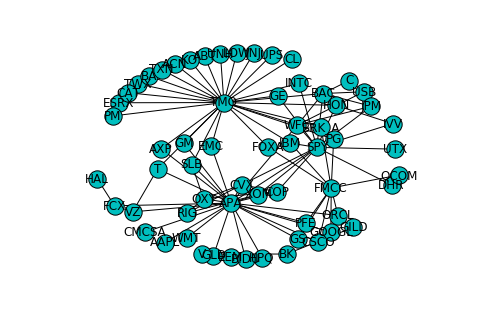

In [120]:

G = nx.Graph()

for start, end, length in edges:
    # You can attach any attributes you want when adding the edge
    G.add_edge(start, end, length=length)

pos = nx.spring_layout(G) 
nx.draw(G, pos, with_labels=True,node_color='c',edge_color='k')
    
    

In [121]:
#Starting from some random centroids
centroids = ['TMO','FMCC','BM','APA','HD','SPY']
red = '#f41b07'
yellow = '#f2cb07'
green = '#8cf207'
blue = '#0769f2'
darkgreen = '#39662e'
orange = '#fc7702'

color = [red,yellow,green,orange,darkgreen, orange ]

#kmean  
stocks = {}
def iterativeKmean(stocks,centroids, Big, conv):
    if conv < 1:
        return
    
    #compute new centroids
    if len(stocks)>0:
        
        for c in range(len(centroids)):
            cate = []
            for s in stocks:
                if stocks[s] == color[c]:
                    cate.append(s) 
            center = {}
            for e in cate:
                for ee in cate:
                    if e != ee:
                        for b in Big: 
                            if b[0] == e and b[1]==ee:
                                if e in center: 
                                    center[e] += b[2]
                                else: 
                                    center[e] = b[2] 
            mval = -1000
            for e in center:
                if center[e] > mval:
                    mval = center[e]
                    centroids[c] = e  
                
    #figure out what category it belongs to 
    for r in Big: 
        mval = -10
        for c in range(len(centroids)):
            if r[0] == centroids[c]:
                stocks[centroids[c]] = color[c]
                continue
            if r[1] == centroids[c]:
                if r[2] > mval:
                    mval = r[2]
                    stocks[r[0]] = color[c]
    iterativeKmean(stocks,centroids, Big, conv-1)
    
iterativeKmean(stocks,centroids, Big, 3)
#after done K-mean, color category and 
#set size of stocks in the porfolio to be large
for r in Big:
    if r[0] in ['AAPL','IBM','MSFT','YHOO']:
        r[5] = 30
    
    if r[0] in stocks:
        r[4] = stocks[r[0]]



In [122]:
stocks

{u'AAPL': '#f41b07',
 u'ABBV': '#f41b07',
 u'ABT': '#f41b07',
 u'ACN': '#f41b07',
 u'AGN': '#fc7702',
 u'AIG': '#f41b07',
 u'AMGN': '#f41b07',
 u'AMZN': '#f41b07',
 u'ANTM': '#fc7702',
 'APA': '#fc7702',
 u'APC': '#fc7702',
 u'AXP': '#f41b07',
 u'BA': '#f41b07',
 u'BAC': '#f41b07',
 u'BIDU': '#f41b07',
 u'BIIB': '#f41b07',
 u'BK': '#fc7702',
 u'BLK': '#f41b07',
 u'BMY': '#f41b07',
 u'BRK_A': '#f41b07',
 u'C': '#f41b07',
 u'CAT': '#f41b07',
 u'CBS': '#fc7702',
 u'CELG': '#f41b07',
 u'CL': '#f41b07',
 u'CMCSA': '#f41b07',
 u'COP': '#f41b07',
 u'COST': '#f41b07',
 u'CSCO': '#f41b07',
 u'CVS': '#f41b07',
 u'CVX': '#f41b07',
 u'DD': '#f41b07',
 u'DHR': '#f41b07',
 u'DIS': '#f41b07',
 u'DOW': '#f41b07',
 u'DUK': '#fc7702',
 u'DVN': '#fc7702',
 u'EBAY': '#f41b07',
 u'EEM': '#fc7702',
 u'EFA': '#f41b07',
 u'EMC': '#f41b07',
 u'EOG': '#f41b07',
 u'EPD': '#f41b07',
 u'ESRX': '#f41b07',
 u'EXC': '#fc7702',
 u'F': '#f41b07',
 u'FB': '#f41b07',
 u'FCX': '#fc7702',
 'FMCC': '#f2cb07',
 u'FNMA': '#fc

In [123]:
Big=np.matrix(Big) 
Big = pd.DataFrame(Big)
Big.columns = ['source','target','weight_corr',\
               'edge_color','source_color', 'source_size']
Big.to_csv('graph.csv', header=True, index=False)
Big.head()
# import it to powerBI

,source,target,weight_corr,edge_color,source_color,source_size
0,AAPL,ABBV,0.0467590371025,#000000,#f41b07,30
1,AAPL,ABT,0.275701223043,#000000,#f41b07,30
2,AAPL,ACN,0.133847582489,#000000,#f41b07,30
3,AAPL,AGN,0.455408622141,#000000,#f41b07,30
4,AAPL,AIG,0.108604135675,#000000,#f41b07,30


In [124]:
# autocorrelation
eq = equities_US_largeCap_clean
eq.tail()

Ticker,AAPL_US_Equity,ABBV_US_Equity,ABT_US_Equity,ACN_US_Equity,AGN_US_Equity,AIG_US_Equity,AMGN_US_Equity,AMZN_US_Equity,ANTM_US_Equity,APA_US_Equity,...,USB_US_Equity,UTX_US_Equity,VWO_US_Equity,VZ_US_Equity,V_US_Equity,WBA_US_Equity,WFC_US_Equity,WMT_US_Equity,XOM_US_Equity,YHOO_US_Equity
Date,,,,,,,,,,,,,,,,,,,,,
2014-08-25,0.014957,0.009295,0.004500,0.005459,0.005162,0.005415,0.002933,0.000661,NaN,NaN,...,0.003329,-0.001002,-0.002653,-0.003072,0.004625,0.003271,0.002727,0.001979,-0.000809,NaN
2014-08-26,-0.003635,0.005417,0.002122,0.003208,-0.002063,0.005566,0.011471,0.011374,NaN,NaN,...,0.002607,0.002006,0.006427,0.010887,-0.003269,-0.006847,0.001748,-0.001317,0.003137,NaN
2014-08-27,-0.003944,0.003053,0.005412,0.001968,0.000704,0.004642,0.022459,0.015104,NaN,NaN,...,0.002364,0.002730,0.006386,0.001626,0.002910,0.000821,0.001551,-0.004220,0.006659,NaN
2014-08-28,0.005642,-0.005909,-0.007021,-0.010680,-0.011121,-0.007819,-0.002102,-0.006110,NaN,NaN,...,-0.010142,-0.012704,-0.010284,0.001826,-0.009764,-0.011153,-0.008519,-0.000530,-0.007416,NaN
2014-08-29,0.012501,0.004143,-0.000471,0.009058,0.009112,0.002149,0.013077,0.005176,NaN,NaN,...,0.006195,0.002849,0.005306,0.001013,-0.002047,0.004810,0.001074,0.003710,0.003433,NaN


In [125]:
#empty space holder
weight = pd.DataFrame(columns=eq.columns, index = eq.columns)
weight.head()

Ticker,AAPL_US_Equity,ABBV_US_Equity,ABT_US_Equity,ACN_US_Equity,AGN_US_Equity,AIG_US_Equity,AMGN_US_Equity,AMZN_US_Equity,ANTM_US_Equity,APA_US_Equity,...,USB_US_Equity,UTX_US_Equity,VWO_US_Equity,VZ_US_Equity,V_US_Equity,WBA_US_Equity,WFC_US_Equity,WMT_US_Equity,XOM_US_Equity,YHOO_US_Equity
Ticker,,,,,,,,,,,,,,,,,,,,,
AAPL_US_Equity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ABBV_US_Equity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ABT_US_Equity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ACN_US_Equity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGN_US_Equity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
#preper for another weight measurement: autoregression
# the weight is the r-sequare value of the regression, 
#hence the predicting power

import math
from sklearn import linear_model
LOOKBACK = 10
for c in eq.columns:
    for d in eq.columns:
        if c == d:
            weight[c][c] = 1
        else:
            
            flag = True
            
            Y = np.array(eq[c][-2*LOOKBACK-1:-LOOKBACK-1]) 
            for y in Y:
                if math.isnan(y):  
                    flag= False 
            X = []  
            for i in range(LOOKBACK): 
                for n in np.array(eq[d][-2*LOOKBACK-i-2:-LOOKBACK-i-2]):
                    if math.isnan(n):
                        flag = False  
                X.append(np.array( eq[d][-2*LOOKBACK-i-2:-LOOKBACK-i-2])) 
            if flag:
                regr = linear_model.LinearRegression() #linear_model.Lasso
                regr.fit(X,Y)
            else: 
                continue
                
            Y_test = np.array(eq[c][-LOOKBACK-1:-1])  
            for y in Y_test:
                if math.isnan(y):  
                    flag = False  
            X_test = []  
            
            for i in range(LOOKBACK): 
                for n in np.array(eq[d][-LOOKBACK-i-2:-i-2]):
                    if math.isnan(n): 
                        flag = False 
                X_test.append(np.array(eq[d][-LOOKBACK-i-2:-i-2]))
            if flag:
                Y_pred = regr.predict(X_test)                 
                w = regr.score( X_test, Y_test)
                weight[d][c] = w  
                #notice unlike before this is not a undirected graph
                #the weight here means node d is predicing node c
                

In [127]:
weight.head()
# since we were aware of the run-time, we picked a very small 
#lookback windows, the prediction score was bad

Ticker,AAPL_US_Equity,ABBV_US_Equity,ABT_US_Equity,ACN_US_Equity,AGN_US_Equity,AIG_US_Equity,AMGN_US_Equity,AMZN_US_Equity,ANTM_US_Equity,APA_US_Equity,...,USB_US_Equity,UTX_US_Equity,VWO_US_Equity,VZ_US_Equity,V_US_Equity,WBA_US_Equity,WFC_US_Equity,WMT_US_Equity,XOM_US_Equity,YHOO_US_Equity
Ticker,,,,,,,,,,,,,,,,,,,,,
AAPL_US_Equity,1,-135.689,-3.98021,-10.0929,-124.921,-37.9244,-5.80133,-148.812,NaN,NaN,...,-1.88207,-29.7966,NaN,-12.302,-20.1372,-10.3727,-3.94165,-6.48585,-21.582,NaN
ABBV_US_Equity,-2.25598,1,-7.11641,-14.3734,-416.548,-59.7003,-14.2446,-532.882,NaN,NaN,...,-8.07314,-119.961,NaN,-21.004,-13.2798,-94.5095,-5.07312,-2.39492,-20.6209,NaN
ABT_US_Equity,-0.7962,-307.81,1,-16.0923,-8.83203,-48.3603,-5.15664,-95.4101,NaN,NaN,...,-2.57983,-42.8618,NaN,-4.61344,-2.6222,-67.3335,-4.48268,-3.21856,-4.85767,NaN
ACN_US_Equity,-1.43148,-747.913,-78.2723,1,-35.1132,-73.6731,-24.4802,-286.11,NaN,NaN,...,-6.92592,-123.683,NaN,-4.55317,-21.9014,-234.626,-7.46592,-5.331,-9.88372,NaN
AGN_US_Equity,-0.480133,-27.0002,-7.08831,-12.1391,1,-26.321,-3.82708,-161.027,NaN,NaN,...,-1.39261,-2.73641,NaN,-1.14498,-7.14136,-39.2875,-0.956994,-4.56521,-1.45251,NaN


In [128]:
#The rest is the same as before. 
#If we had more time, we should use a function call 
import math
Big = []

darkred='#60606'
black = '#000000'
corr = weight 
for c in corr.columns:
    for d in corr.columns:
        if c != d and not math.isnan(corr[c][d]) and corr[c][d] != 0: 
            c_cut = c.replace("_US_Equity", "")
            d_cut = d.replace("_US_Equity", "")
            if corr[c][d] > 0:
                row = [c_cut, d_cut, corr[c][d], black, black, 10] 
            else: 
                row = [c_cut, d_cut, corr[c][d], darkred, black, 10] 
            Big.append(row)

In [129]:
centroids = ['TMO','FMCC','BM','APA','HD','SPY']
red = '#f41b07'
yellow = '#f2cb07'
green = '#8cf207'
blue = '#0769f2'
darkgreen = '#39662e'
orange = '#fc7702'

color = [red,yellow,green,orange,darkgreen, orange ]

#kmean  
stocks = {}
def iterativeKmean(stocks,centroids, Big, conv):
    if conv < 1:
        return
    
    #compute new centroids
    if len(stocks)>0:
        
        for c in range(len(centroids)):
            cate = []
            for s in stocks:
                if stocks[s] == color[c]:
                    cate.append(s) 
            center = {}
            for e in cate:
                for ee in cate:
                    if e != ee:
                        for b in Big: 
                            if b[0] == e and b[1]==ee:
                                if e in center: 
                                    center[e] += b[2]
                                else: 
                                    center[e] = b[2] 
            mval = -1000
            for e in center:
                if center[e] > mval:
                    mval = center[e]
                    centroids[c] = e  
                
    #figure out what category it belongs to 
    for r in Big: 
        mval = -10
        for c in range(len(centroids)):
            if r[0] == centroids[c]:
                stocks[centroids[c]] = color[c]
                continue
            if r[1] == centroids[c]:
                if r[2] > mval:
                    mval = r[2]
                    stocks[r[0]] = color[c]
    iterativeKmean(stocks,centroids, Big, conv-1)
    
iterativeKmean(stocks,centroids, Big, 3)
#after done K-mean, color category and 
#set size of stocks in the porfolio to be large
for r in Big:
    if r[0] in ['AAPL','IBM','MSFT','YHOO']:
        r[5] = 30
    
    if r[0] in stocks:
        r[4] = stocks[r[0]]



In [130]:
stocks

{u'AAPL': '#fc7702',
 u'ABT': '#39662e',
 u'ACN': '#39662e',
 u'AGN': '#39662e',
 u'AIG': '#39662e',
 u'AMGN': '#39662e',
 u'AMZN': '#39662e',
 u'APC': '#39662e',
 u'AXP': '#39662e',
 u'BA': '#39662e',
 u'BAC': '#39662e',
 u'BIDU': '#39662e',
 u'BIIB': '#39662e',
 u'BLK': '#39662e',
 u'BMY': '#39662e',
 u'BRK_A': '#39662e',
 u'C': '#39662e',
 u'CAT': '#39662e',
 u'CELG': '#39662e',
 u'CMCSA': '#39662e',
 u'COP': '#39662e',
 u'COST': '#39662e',
 u'CSCO': '#39662e',
 u'CVS': '#39662e',
 u'CVX': '#39662e',
 u'DD': '#39662e',
 u'DHR': '#39662e',
 u'DIS': '#39662e',
 u'DOW': '#39662e',
 u'EBAY': '#39662e',
 u'EFA': '#39662e',
 u'EMC': '#39662e',
 u'EOG': '#39662e',
 u'EPD': '#39662e',
 u'ESRX': '#39662e',
 u'F': '#39662e',
 u'FB': '#39662e',
 u'FOXA': '#39662e',
 u'GE': '#39662e',
 u'GILD': '#39662e',
 u'GM': '#39662e',
 u'GOOGL': '#39662e',
 u'GS': '#39662e',
 u'HAL': '#39662e',
 'HD': '#39662e',
 u'HON': '#39662e',
 u'HPQ': '#39662e',
 u'IBM': '#39662e',
 u'INTC': '#39662e',
 u'JNJ': '#39

In [131]:
Big=np.matrix(Big) 
Big = pd.DataFrame(Big)
Big.columns = ['source','target','weight_timeSeriesCorr',\
               'edge_color','source_color', 'source_size']
Big.to_csv('graph_autoregre.csv', header=True, index=False)
Big.head()

,source,target,weight_timeSeriesCorr,edge_color,source_color,source_size
0,AAPL,ABBV,-2.25598461612,#60606,#fc7702,30
1,AAPL,ABT,-0.796200329029,#60606,#fc7702,30
2,AAPL,ACN,-1.43147550071,#60606,#fc7702,30
3,AAPL,AGN,-0.480133048689,#60606,#fc7702,30
4,AAPL,AIG,-1.72319680156,#60606,#fc7702,30
